In [269]:
import tensorflow as tf
import matplotlib.pyplot as plt
import re
import numpy as np

In [270]:
corpus = """There lived a cat and mouse in my house. The cat and mouse are always fighting.
But the mouse was smart enough to evade the cat.
I assumed the cat will eat the mouse someday but eventually cat and mouse were just friends and i worried for nothing"""

In [271]:
sentences = []

for sentence in corpus.split("."):
  sentences.append(sentence.strip().lower())

In [272]:
sentences

['there lived a cat and mouse in my house',
 'the cat and mouse are always fighting',
 'but the mouse was smart enough to evade the cat',
 'i assumed the cat will eat the mouse someday but eventually cat and mouse were just friends and i worried for nothing']

In [273]:
window_length = 4
embeddings_dim = 2

In [274]:
encode = dict()
decode = dict()

vocab_size = 1

for sentence in sentences:
  for word in sentence.split(" "):
    if word.isalnum():
      if word not in encode:
        encode[word] = vocab_size
        decode[vocab_size] = word
        vocab_size += 1

In [275]:
vocab_size

32

In [276]:
encode['always'], decode[encode['always']]

(12, 'always')

In [277]:
X = []
y = []

for sentence in sentences:
  words = sentence.split(" ")
  length = len(words)
  for idx, word in enumerate(words):
    if idx + 5 > length:
      break
    else:
      word_list = words[idx:idx+2] + words[idx+3:idx+5]
      # print(word_list)
      X.append([encode[i] for i in word_list])
      y.append(encode[words[idx+2]])

X = np.array(X)
y = np.array(y)

In [278]:
X[5], y[5]

(array([10,  4,  6, 11]), np.int64(5))

In [279]:
embedding_dim = 2

In [280]:
X[0], y[0]

(array([1, 2, 4, 5]), np.int64(3))

In [281]:
len(X), len(y)

(32, 32)

In [284]:
# Build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=4,name='embeddings'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

# Compile with sparse_categorical_crossentropy for integer labels
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
model.fit(X, y, epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step - accuracy: 0.0000e+00 - loss: 3.4660
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0000e+00 - loss: 3.4652
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0000e+00 - loss: 3.4643
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.0000e+00 - loss: 3.4634
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0000e+00 - loss: 3.4626
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0000e+00 - loss: 3.4617
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0312 - loss: 3.4609
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0312 - loss: 3.4600
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0312 - loss: 3.4591
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1250 - loss: 3.4583


In [285]:
model.get_layer('embeddings')(tf.convert_to_tensor(encode['mouse'])).numpy().tolist()

[0.01692473143339157, 0.04845861345529556]

In [287]:
embeddings = []

for word in encode:
  emdeds = model.get_layer('embeddings')(tf.convert_to_tensor(encode[word])).numpy().tolist()
  embeddings.append((word, emdeds))

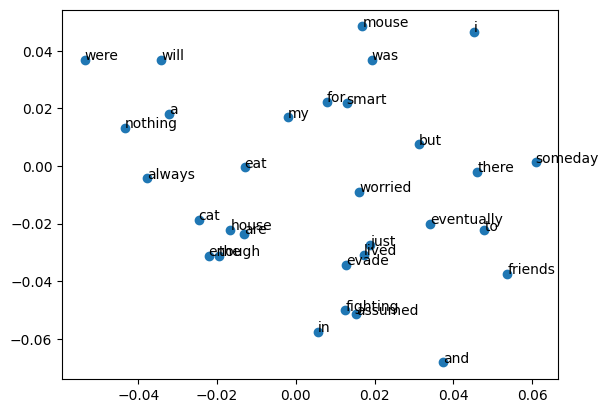

In [289]:
plt.scatter([x[1][0] for x in embeddings],[x[1][1] for x in embeddings])

for embed in embeddings:
  word = embed[0]
  x = embed[1][0]
  y = embed[1][1]
  plt.text(x,y,word)